# Group Assignment 1

In [7]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import numpy as np 
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from collections import Counter
import re
from selenium import webdriver
from selenium.webdriver.common.by import By
import time
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
import nltk
from nltk.corpus import stopwords
#nltk.download('stopwords')
import itertools
from sklearn.manifold import MDS

## Scraper Development

In [8]:
def scrape_page(url):
    response = requests.get(url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.text, "html.parser")

        messages = soup.find_all("div", class_ = "Message userContent")

        dates = soup.find_all("time")

        data = []

        for message, date in zip(messages, dates):
            message_text = message.get_text(strip = True)
            date_text = date.get("title")
            data.append({"Date": date_text, "Message": message_text})

        return data


def scrape_forum(base_url, total_pages):
    all_data = []

    for page_num in range(1, total_pages + 1):
        page_url = f"{base_url}/p{page_num}"
        print(f"Scraping page {page_num}: {page_url}")
        page_data = scrape_page(page_url)
        all_data.extend(page_data)
    return all_data

In [9]:
base_url = "https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans"
total_pages = 300
forum_data = scrape_forum(base_url, total_pages)
messagedata = pd.DataFrame(forum_data)
messagedata.to_csv("messagedata.csv", index = False)
len(messagedata)

Scraping page 1: https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p1
Scraping page 2: https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p2
Scraping page 3: https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p3
Scraping page 4: https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p4
Scraping page 5: https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p5
Scraping page 6: https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p6
Scraping page 7: https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p7
Scraping page 8: https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p8
Scraping page 9: https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p9
S

15001

## Task A

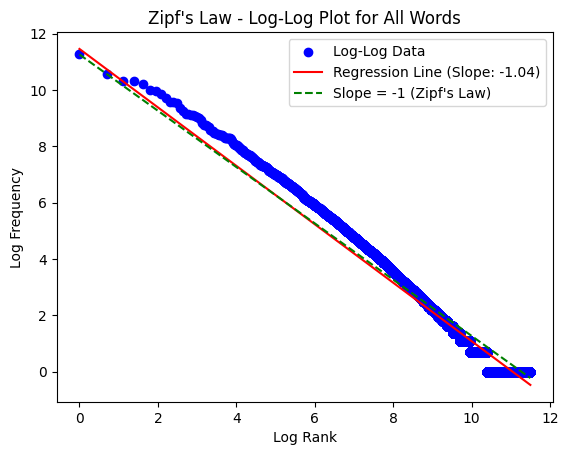

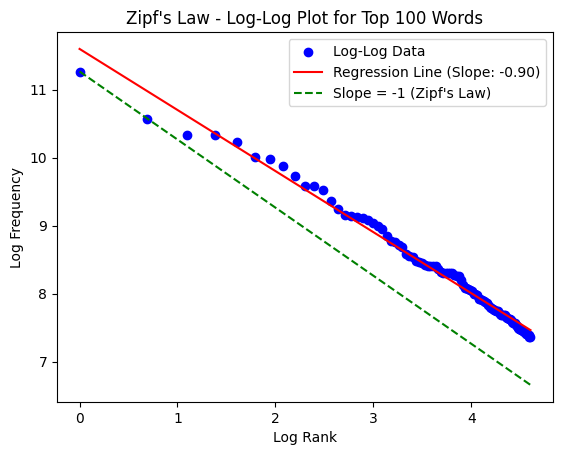

In [10]:
# Importing Data
messagedf = pd.read_csv("messagedata.csv")
messagedf['Message'] = messagedf['Message'].fillna('')

# Counting Number of Words and Sorting
words = ' '.join(messagedf['Message']).lower().split()
word_counts = Counter(words)
sorted_word_counts = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)
sorted_word_counts_100 = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)[:100]

# All Words

# Finding Ranks and Frequencies
ranks = np.arange(1, len(sorted_word_counts) + 1)
frequencies = np.array([count for word, count in sorted_word_counts])

# Log Transformations
log_ranks = np.log(ranks)
log_frequencies = np.log(frequencies)

# Econometric Regression
X = sm.add_constant(log_ranks)
model = sm.OLS(log_frequencies, X)
results = model.fit()

# Graphing Results 
zipf_line = log_frequencies[0] + (-1) * (log_ranks - log_ranks[0])

plt.scatter(log_ranks, log_frequencies, color='blue', label='Log-Log Data')
plt.plot(log_ranks, results.predict(X), color='red', label=f'Regression Line (Slope: {results.params[1]:.2f})')
plt.plot(log_ranks, zipf_line, color='green', linestyle='--', label='Slope = -1 (Zipf\'s Law)')
plt.xlabel('Log Rank')
plt.ylabel('Log Frequency')
plt.title('Zipf\'s Law - Log-Log Plot for All Words')
plt.legend()
plt.show()

# Top 100

# Finding Ranks and Frequencies
ranks_100 = np.arange(1, len(sorted_word_counts_100) + 1)
frequencies_100 = np.array([count for word, count in sorted_word_counts_100])

# Log Transformations
log_ranks_100 = np.log(ranks_100)
log_frequencies_100 = np.log(frequencies_100)

# Econometric Regression
X_100 = sm.add_constant(log_ranks_100)
model_100 = sm.OLS(log_frequencies_100, X_100)
results_100 = model_100.fit()

# Graphing Results 
zipf_line_100 = log_frequencies_100[0] + (-1) * (log_ranks_100 - log_ranks_100[0])

plt.scatter(log_ranks_100, log_frequencies_100, color='blue', label='Log-Log Data')
plt.plot(log_ranks_100, results_100.predict(X_100), color='red', label=f'Regression Line (Slope: {results_100.params[1]:.2f})')
plt.plot(log_ranks_100, zipf_line_100, color='green', linestyle='--', label='Slope = -1 (Zipf\'s Law)')
plt.xlabel('Log Rank')
plt.ylabel('Log Frequency')
plt.title('Zipf\'s Law - Log-Log Plot for Top 100 Words')
plt.legend()
plt.show()

## Task B

In [11]:
# ChatGPT Support
# Set up ChromeDriver path
driver_path = "/Users/ramzikattan/Downloads/chromedriver-mac-arm64/chromedriver"
chrome_path = "/Applications/Google Chrome.app/Contents/MacOS/Google Chrome"

# Configure Chrome options
chrome_options = Options()
chrome_options.binary_location = chrome_path

# Set up the Chrome WebDriver service
service = Service(driver_path)
driver = webdriver.Chrome(service=service, options=chrome_options)

# Open the webpage
carurl = "https://www.kbb.com/car-make-model-list/used/view-all/make/"
driver.get(carurl)
time.sleep(5)  # Wait for the page to load

# Parse the page with BeautifulSoup
html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')

# Close the browser after fetching the page
driver.quit()

# Find all table rows
rows = soup.find_all("tr")
print(f"Number of rows fetched: {len(rows)}")

make_model_data = []

# Loop through each row and extract make, model, and years
for row in rows:
    tds = row.find_all("td", class_="css-irk93x ee33uo33")
    
    # Check if the expected number of <td> elements exist
    if len(tds) >= 3:
        try:
            # Extract model from the second <td>
            model_td = tds[0]
            model = model_td.find("div", class_="css-z687n ee33uo36").get_text(strip=True)
            
            # Extract make from the third <td>
            make_td = tds[1]
            make = make_td.find("div", class_="css-z687n ee33uo36").get_text(strip=True)
            
            # Append the extracted data
            make_model_data.append({
                "make": make,
                "model": model,
            })
        except Exception as e:
            print(f"Error parsing row: {e}")

makemodeldf = pd.DataFrame(make_model_data)
makemodeldf.to_csv("make_model_data.csv")

NoSuchDriverException: Message: Unable to obtain driver for chrome; For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors/driver_location


In [12]:
# for hadley: 
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from webdriver_manager.chrome import ChromeDriverManager
from bs4 import BeautifulSoup
import pandas as pd
import time

# Configure Chrome options
chrome_path = "/Applications/Google Chrome.app/Contents/MacOS/Google Chrome"
chrome_options = Options()
chrome_options.binary_location = chrome_path

# Automatically download and use the correct ChromeDriver version
service = Service(ChromeDriverManager().install())
driver = webdriver.Chrome(service=service, options=chrome_options)

# Open the webpage
carurl = "https://www.kbb.com/car-make-model-list/used/view-all/make/"
driver.get(carurl)
time.sleep(5)  # Wait for the page to load

# Parse the page with BeautifulSoup
html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')

# Close the browser after fetching the page
driver.quit()

# Find all table rows
rows = soup.find_all("tr")
print(f"Number of rows fetched: {len(rows)}")

make_model_data = []

# Loop through each row and extract make, model, and years
for row in rows:
    tds = row.find_all("td", class_="css-irk93x ee33uo33")
    
    # Check if the expected number of <td> elements exist
    if len(tds) >= 3:
        try:
            # Extract model from the first <td>
            model_td = tds[0]
            model = model_td.find("div", class_="css-z687n ee33uo36").get_text(strip=True)
            
            # Extract make from the second <td>
            make_td = tds[1]
            make = make_td.find("div", class_="css-z687n ee33uo36").get_text(strip=True)
            
            # Append the extracted data
            make_model_data.append({
                "make": make,
                "model": model,
            })
        except Exception as e:
            print(f"Error parsing row: {e}")

# Convert the extracted data into a pandas DataFrame and save it to a CSV file
makemodeldf = pd.DataFrame(make_model_data)
makemodeldf.to_csv("make_model_data.csv", index=False)


Number of rows fetched: 1418


In [13]:
# Merging the two dataframes to account for most car brands
makemodeldf['make'] = makemodeldf['make'].str.lower()
makemodeldf['model'] = makemodeldf['model'].str.lower()
print(len(makemodeldf))

makemodeldf2 = pd.read_csv("Replacement_words.csv")
makemodeldf2.rename(columns={'Brand': 'make'}, inplace=True)
makemodeldf2.rename(columns={'Model': 'model'}, inplace=True)
makemodeldf2['make'] = makemodeldf2['make'].str.lower()
makemodeldf2['model'] = makemodeldf2['model'].str.lower()
print(len(makemodeldf2))

# Save to CSV
mergedmakemodel = pd.concat([makemodeldf, makemodeldf2], ignore_index=True)
mergedmakemodel = mergedmakemodel.drop_duplicates()
mergedmakemodel.to_csv("merged.csv")
print(len(mergedmakemodel))

1417
539
1731


In [14]:
stop_words = set(stopwords.words('english'))
model_to_brand = dict(zip(mergedmakemodel['model'].str.lower(), mergedmakemodel['make'].str.lower()))
brands_set = set(model_to_brand.values())

def replacements(message, model_to_brand, brands_set):
    words = re.findall(r'\w+', message.lower())
    replaced_words = [model_to_brand.get(word, word) for word in words]
    return set([word for word in replaced_words if word not in stop_words and word in brands_set])

messages = messagedf['Message']
brand_counter = Counter()

for message in messages:
    brands = replacements(message, model_to_brand, brands_set)
    brand_counter.update(brands)

brands_to_remove = ['car', 'sedan', 'problem', 'seat', 'mini']

for brand in brands_to_remove:
    brand_counter.pop(brand, None)

top_10 = brand_counter.most_common(10)

print("Top 10 Brands by Frequency:")
for brand, count in top_10:
    print(f"{brand.capitalize()}: {count}")

Top 10 Brands by Frequency:
Infiniti: 11162
Lexus: 9380
Bmw: 5112
Acura: 3232
Polestar: 2365
Audi: 2234
Honda: 1691
Cadillac: 1319
Toyota: 1000
Nissan: 835


## Task C

In [15]:
top_10_brands = [brand for brand, count in top_10]

def find_co_occurrences(message, top_10_brands, distance=5):
    words = message.split()
    found_brands = []
    
    for i, word in enumerate(words):
        if word in top_10_brands:
            found_brands.append((word, i)) 
    
    co_occurrences = set()
    for (brand1, idx1), (brand2, idx2) in itertools.combinations(found_brands, 2):
        if abs(idx1 - idx2) <= distance:
            co_occurrences.add((brand1, brand2))
    
    return co_occurrences

brand_counter = Counter()
co_occurrence_counter = Counter()

total_messages = len(messagedf)
for message in messagedf['Message']:

    replaced_message = replacements(message, model_to_brand, brands_set)
    replaced_message_str = ' '.join(replaced_message)
    
    brands_in_message = set(replaced_message).intersection(top_10_brands)
    
    brand_counter.update(brands_in_message)
    
    co_occurrences = find_co_occurrences(replaced_message_str, top_10_brands, distance=5)
    co_occurrence_counter.update(co_occurrences)

def calculate_lift(brand1, brand2, brand_counter, co_occurrence_counter, total_messages):
    P_A = brand_counter[brand1] / total_messages 
    P_B = brand_counter[brand2] / total_messages  
    P_AB = co_occurrence_counter[(brand1, brand2)] / total_messages 
    if P_A * P_B == 0: 
        return 0
    return P_AB / (P_A * P_B)

lift_results = []
for (brand1, brand2) in itertools.combinations(top_10_brands, 2):
    lift = calculate_lift(brand1, brand2, brand_counter, co_occurrence_counter, total_messages)
    lift_results.append((brand1, brand2, lift))

lift_df = pd.DataFrame(lift_results, columns=['Brand1', 'Brand2', 'Lift'])
lift_df.sort_values(by='Lift', ascending=False, inplace=True)
print(lift_df)

lift_df.to_csv('brand_lift_ratios.csv', index=False)

      Brand1    Brand2      Lift
41     honda    nissan  2.507276
44    toyota    nissan  2.281589
26     acura     honda  1.778608
31  polestar     honda  1.594169
25     acura      audi  1.375383
27     acura  cadillac  1.337173
28     acura    toyota  1.322799
24     acura  polestar  1.267798
34  polestar    nissan  1.207813
9      lexus       bmw  1.101208
30  polestar      audi  1.090278
1   infiniti       bmw  0.981398
38      audi    nissan  0.908718
36      audi  cadillac  0.850176
37      audi    toyota  0.792354
29     acura    nissan  0.767081
35      audi     honda  0.726682
8   infiniti    nissan  0.682429
43  cadillac    nissan  0.599296
0   infiniti     lexus  0.538720
12     lexus      audi  0.418784
4   infiniti      audi  0.344105
11     lexus  polestar  0.268458
13     lexus     honda  0.222250
16     lexus    nissan  0.181951
19       bmw      audi  0.161566
18       bmw  polestar  0.130283
22       bmw    toyota  0.129117
20       bmw     honda  0.119739
21       b

## Task D

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


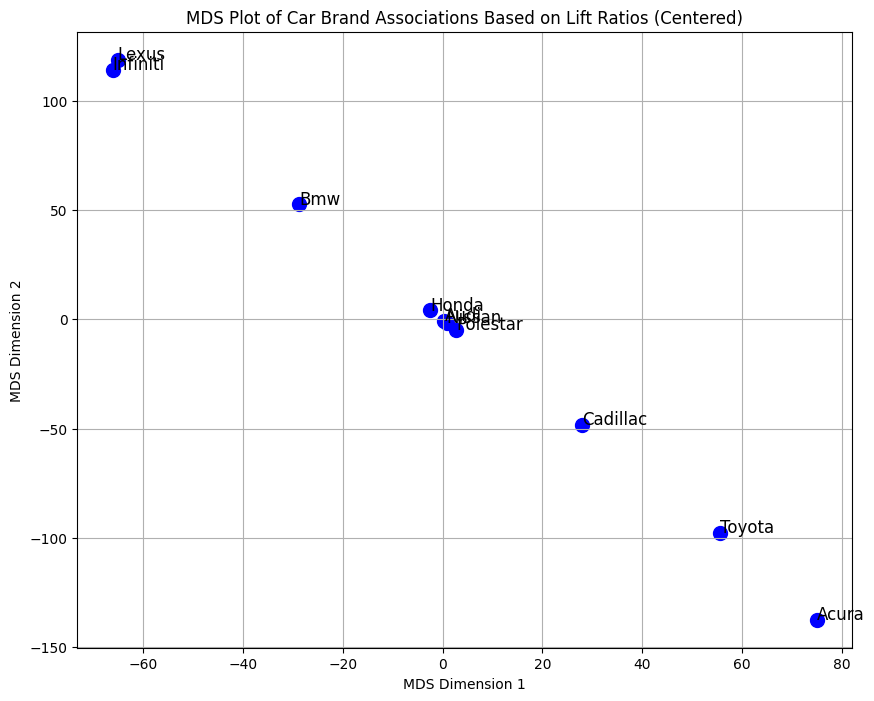

In [16]:
# Now, the part for MDS:

# Convert the 'brands_set' to a list for index lookups
brands_list = list(brands_set)

# Initialize the dissimilarity matrix for top 10 brands
dissimilarity_matrix = np.ones((10, 10))

# Populate the dissimilarity matrix with lift values
for _, row in lift_df.iterrows():
    if row['Brand1'] in top_10_brands and row['Brand2'] in top_10_brands:
        brand1_idx = top_10_brands.index(row['Brand1'])
        brand2_idx = top_10_brands.index(row['Brand2'])
        lift_value = row['Lift']
        dissimilarity_matrix[brand1_idx, brand2_idx] = 1 / lift_value if lift_value != 0 else 1
        dissimilarity_matrix[brand2_idx, brand1_idx] = dissimilarity_matrix[brand1_idx, brand2_idx]

# Apply MDS
mds = MDS(n_components=2, dissimilarity='precomputed', random_state=42)
mds_coords = mds.fit_transform(dissimilarity_matrix)

# Center the MDS coordinates
mds_coords_centered = mds_coords - mds_coords.mean(axis=0)

# Plot the MDS results
plt.figure(figsize=(10, 8))
plt.scatter(mds_coords_centered[:, 0], mds_coords_centered[:, 1], color='blue', s=100)

# Annotate each brand on the plot
for i, brand in enumerate(top_10_brands):
    plt.annotate(brand.capitalize(), (mds_coords_centered[i, 0], mds_coords_centered[i, 1]), fontsize=12)

# Adding title and labels
plt.title('MDS Plot of Car Brand Associations Based on Lift Ratios (Centered)')
plt.xlabel('MDS Dimension 1')
plt.ylabel('MDS Dimension 2')
plt.grid(True)
plt.show()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


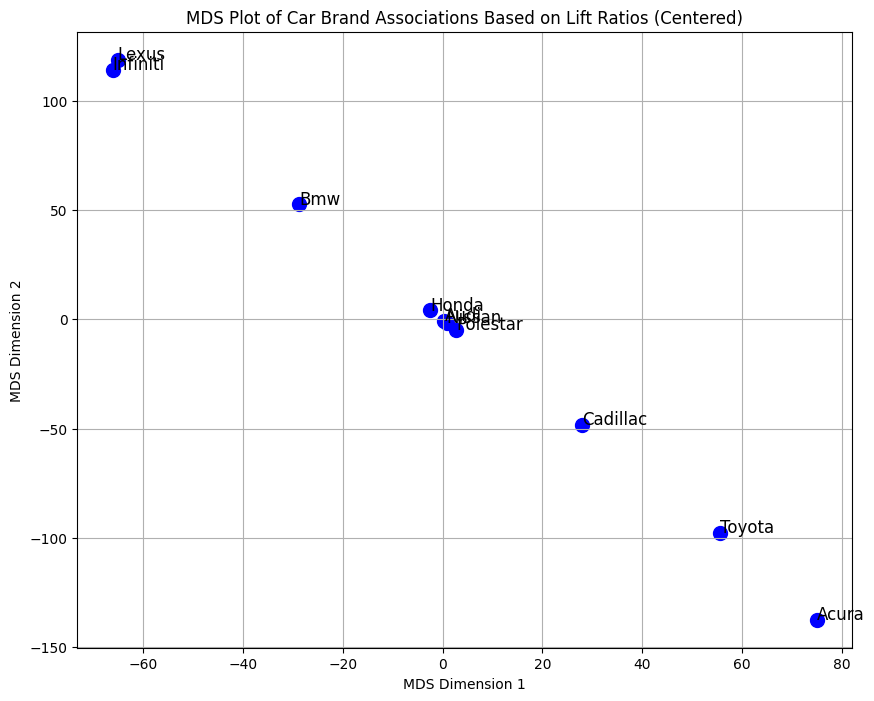

In [17]:

# Now, the part for MDS:

# Convert the 'brands_set' to a list for index lookups
brands_list = list(brands_set)

# Initialize the dissimilarity matrix for top 10 brands
dissimilarity_matrix = np.ones((10, 10))

# Populate the dissimilarity matrix with lift values
for _, row in lift_df.iterrows():
    if row['Brand1'] in top_10_brands and row['Brand2'] in top_10_brands:
        brand1_idx = top_10_brands.index(row['Brand1'])
        brand2_idx = top_10_brands.index(row['Brand2'])
        lift_value = row['Lift']
        dissimilarity_matrix[brand1_idx, brand2_idx] = 1 / lift_value if lift_value != 0 else 1
        dissimilarity_matrix[brand2_idx, brand1_idx] = dissimilarity_matrix[brand1_idx, brand2_idx]

# Apply MDS
mds = MDS(n_components=2, dissimilarity='precomputed', random_state=42)
mds_coords = mds.fit_transform(dissimilarity_matrix)

# Center the MDS coordinates
mds_coords_centered = mds_coords - mds_coords.mean(axis=0)

# Plot the MDS results
plt.figure(figsize=(10, 8))
plt.scatter(mds_coords_centered[:, 0], mds_coords_centered[:, 1], color='blue', s=100)

# Annotate each brand on the plot
for i, brand in enumerate(top_10_brands):
    plt.annotate(brand.capitalize(), (mds_coords_centered[i, 0], mds_coords_centered[i, 1]), fontsize=12)

# Adding title and labels
plt.title('MDS Plot of Car Brand Associations Based on Lift Ratios (Centered)')
plt.xlabel('MDS Dimension 1')
plt.ylabel('MDS Dimension 2')
plt.grid(True)
plt.show()


# Task E

What insights can you offer to your client from your analyses in Tasks C and D? 

Toyota is not really viewed as a luxury car. 

Y axis seems like performance. X axis seems like luxury. 

Brand1	Brand2	Lift
- 26	acura	honda	        1.888399
- 37	audi	toyota	        1.329543
- 38	audi	nissan	        1.326889
- 22	bmw	toyota	            1.276494
- 18	bmw	polestar	        1.197362
- 17	bmw	acura	            1.153086
- 42	cadillac	toyota	    1.103182
- 0	infiniti	lexus	        1.099362
- 20	bmw	honda	            1.032530
- 35	audi	honda	        0.988764
- 5	infiniti	honda	        0.882975
- 43	cadillac	nissan	    0.871704

# Task F

What are 5 most frequently mentioned attributes or features of cars in the discussions? Which attributes are most strongly associated with which of these 5 brands? There is no need to plot the MDS plot for this question. 

In [18]:
import pandas as pd
from collections import Counter
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Assuming 'discussion_df' contains the text of the discussions in a column called 'message'

# A list of car-related attributes to look for (this can be expanded based on your data)
attributes = ["speed", "comfort", "design", "performance", "price", "safety", "interior", "fuel", "handling", "reliability"]

# Preprocessing and tokenizing the discussions
def preprocess_text(text):
    # Lowercasing, removing non-alphanumeric characters
    text = re.sub(r'[^\w\s]', '', text.lower())
    
    # Tokenizing the text
    tokens = word_tokenize(text)
    
    # Removing stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    
    return tokens

# Apply the preprocessing and tokenizing function to the 'message' column
messagedf['tokens'] = messagedf['Message'].apply(preprocess_text)

# Flatten the list of tokens and count the frequency of attributes
all_tokens = [token for sublist in messagedf['tokens'] for token in sublist]
attribute_counts = Counter([word for word in all_tokens if word in attributes])

# Get the 5 most frequently mentioned attributes
top_5_attributes = attribute_counts.most_common(5)
print(f"Top 5 Attributes: {top_5_attributes}")


Top 5 Attributes: [('performance', 2207), ('price', 1922), ('interior', 1388), ('handling', 1047), ('speed', 737)]


In [20]:
# List of irrelevant words (like "car") to remove from the results
brands_to_exclude = ['car']

# Initialize counters for brand-attribute associations
brand_attribute_counter = {attr: Counter() for attr in top_5_attributes}

# Process each message in the dataset
for message in messages:
    brands_in_message, attributes_in_message = extract_brands_and_attributes(message, model_to_brand, brands_set, top_5_attributes)
    
    # Filter out irrelevant brands like "car"
    brands_in_message = brands_in_message - set(brands_to_exclude)
    
    # Count co-occurrences of each brand with each attribute
    for brand in brands_in_message:
        for attribute in attributes_in_message:
            brand_attribute_counter[attribute][brand] += 1

# Output the top 3 brands for each attribute
for attribute, brand_counts in brand_attribute_counter.items():
    top_3_brands = brand_counts.most_common(3)
    print(f"Top 3 Brands for {attribute.capitalize()}:")
    for brand, count in top_3_brands:
        print(f"  {brand.capitalize()}: {count} mentions")
    print("\n")


AttributeError: 'tuple' object has no attribute 'capitalize'

In [23]:
for message in messages:
    brands_in_message, attributes_in_message = extract_brands_and_attributes(message, model_to_brand, brands_set, top_5_attributes)
    print(f"Brands: {brands_in_message}, Attributes: {attributes_in_message}")
    # Filter out irrelevant brands like "car"
    brands_in_message = brands_in_message - set(brands_to_exclude)


Brands: {'acura', 'jaguar', 'mercedes-benz', 'cadillac', 'chrysler', 'infiniti', 'sedan', 'volvo', 'car', 'audi', 'lexus', 'bmw'}, Attributes: set()
Brands: {'mercedes-benz', 'acura', 'jaguar', 'audi', 'bmw', 'seat', 'toyota', 'cadillac', 'buick', 'chrysler', 'sedan', 'ford', 'car', 'infiniti', 'problem', 'lexus', 'mini'}, Attributes: set()
Brands: {'acura', 'lexus', 'honda', 'infiniti'}, Attributes: set()
Brands: set(), Attributes: set()
Brands: set(), Attributes: set()
Brands: {'bmw', 'lexus', 'sedan', 'infiniti', 'mini'}, Attributes: set()
Brands: {'sedan', 'car', 'infiniti', 'lexus', 'bmw'}, Attributes: set()
Brands: {'lexus', 'infiniti', 'car'}, Attributes: set()
Brands: {'audi', 'toyota', 'car', 'infiniti', 'lexus'}, Attributes: set()
Brands: {'infiniti'}, Attributes: set()
Brands: {'mini', 'lexus', 'sedan', 'infiniti'}, Attributes: set()
Brands: {'saab', 'audi', 'cadillac', 'sedan', 'infiniti', 'lexus', 'bmw'}, Attributes: set()
Brands: {'lexus', 'bmw'}, Attributes: set()
Brands

In [24]:
for brand in brands_in_message:
    for attribute in attributes_in_message:
        print(f"Counting {brand} for {attribute}")
        brand_attribute_counter[attribute][brand] += 1

In [25]:
print(f"Attributes in message: {attributes_in_message}")
print(f"Top 5 Attributes: {top_5_attributes}")


Attributes in message: set()
Top 5 Attributes: [('performance', 2207), ('price', 1922), ('interior', 1388), ('handling', 1047), ('speed', 737)]


In [26]:
# List of irrelevant words (like "car") to remove from the results
brands_to_exclude = ['car']

# Initialize counters for brand-attribute associations
brand_attribute_counter = {attr: Counter() for attr in top_5_attributes}

# Process each message in the dataset
for message in messages:
    brands_in_message, attributes_in_message = extract_brands_and_attributes(message, model_to_brand, brands_set, top_5_attributes)
    
    # Filter out irrelevant brands like "car"
    brands_in_message = brands_in_message - set(brands_to_exclude)
    
    # Count co-occurrences of each brand with each attribute
    for brand in brands_in_message:
        for attribute in attributes_in_message:
            brand_attribute_counter[attribute][brand] += 1

# Output the top 3 brands for each attribute
for attribute, brand_counts in brand_attribute_counter.items():
    # Ensure the attribute is a string before capitalizing
    if isinstance(attribute, tuple):
        attribute = attribute[0]  # Extract the string value if it's a tuple
    top_3_brands = brand_counts.most_common(3)
    print(f"Top 3 Brands for {attribute.capitalize()}:")
    for brand, count in top_3_brands:
        print(f"  {brand.capitalize()}: {count} mentions")
    print("\n")

Top 3 Brands for Performance:


Top 3 Brands for Price:


Top 3 Brands for Interior:


Top 3 Brands for Handling:


Top 3 Brands for Speed:




In [ ]:
# List of irrelevant words (like "car") to remove from the results
brands_to_exclude = ['car']

# Initialize counters for brand-attribute associations
brand_attribute_counter = {attr: Counter() for attr in top_5_attributes}

# Process each message in the dataset
for message in messages:
    brands_in_message, attributes_in_message = extract_brands_and_attributes(message, model_to_brand, brands_set, top_5_attributes)
    
    # Filter out irrelevant brands like "car"
    brands_in_message = brands_in_message - set(brands_to_exclude)
    
    # Count co-occurrences of each brand with each attribute
    for brand in brands_in_message:
        for attribute in attributes_in_message:
            brand_attribute_counter[attribute][brand] += 1

# Output the top 10 brands for each attribute and debug 'speed' attribute if needed
for attribute, brand_counts in brand_attribute_counter.items():
    top_10_brands = brand_counts.most_common(10)  # Get the top 10 brands
    
    # Debugging output for 'speed' to make sure it's correctly handled
    if attribute == 'speed':
        print(f"\nDEBUG: All brands associated with speed: {brand_counts}\n")
    
    print(f"Top 10 Brands for {attribute.capitalize()}:")
    for brand, count in top_10_brands:
        print(f"  {brand.capitalize()}: {count} mentions")
    print("\n")


Top 10 Brands for Performance:
  Infiniti: 1473 mentions
  Lexus: 1421 mentions
  Bmw: 884 mentions
  Sedan: 576 mentions
  Acura: 561 mentions
  Polestar: 418 mentions
  Audi: 399 mentions
  Honda: 318 mentions
  Cadillac: 234 mentions
  Toyota: 198 mentions


Top 10 Brands for Price:
  Infiniti: 1324 mentions
  Lexus: 1289 mentions
  Bmw: 857 mentions
  Acura: 492 mentions
  Polestar: 416 mentions
  Audi: 383 mentions
  Honda: 286 mentions
  Sedan: 282 mentions
  Cadillac: 228 mentions
  Seat: 173 mentions


Top 10 Brands for Interior:
  Infiniti: 911 mentions
  Lexus: 832 mentions
  Bmw: 464 mentions
  Acura: 367 mentions
  Audi: 297 mentions
  Polestar: 251 mentions
  Seat: 218 mentions
  Cadillac: 205 mentions
  Honda: 202 mentions
  Sedan: 197 mentions


Top 10 Brands for Handling:
  Infiniti: 825 mentions
  Lexus: 785 mentions
  Bmw: 513 mentions
  Acura: 348 mentions
  Sedan: 258 mentions
  Audi: 249 mentions
  Polestar: 219 mentions
  Honda: 195 mentions
  Seat: 136 mentions
 

In [ ]:
import pandas as pd

# List of irrelevant words (like "car") to remove from the results
brands_to_exclude = ['car','sedan','seat']

# Initialize counters for brand-attribute associations
brand_attribute_counter = {attr: Counter() for attr in top_5_attributes}

# Process each message in the dataset
for message in messages:
    brands_in_message, attributes_in_message = extract_brands_and_attributes(message, model_to_brand, brands_set, top_5_attributes)
    
    # Filter out irrelevant brands like "car"
    brands_in_message = brands_in_message - set(brands_to_exclude)
    
    # Count co-occurrences of each brand with each attribute
    for brand in brands_in_message:
        for attribute in attributes_in_message:
            brand_attribute_counter[attribute][brand] += 1

# Create a dictionary to store the top 10 brands for each attribute
top_10_brands_dict = {}

for attribute, brand_counts in brand_attribute_counter.items():
    top_10_brands = [brand for brand, count in brand_counts.most_common(10)]  # Get the top 10 brands
    top_10_brands_dict[attribute] = top_10_brands

# Convert the dictionary into a DataFrame
top_10_brands_df = pd.DataFrame.from_dict(top_10_brands_dict, orient='index', columns=[f'Rank {i+1}' for i in range(10)])

# Display the DataFrame
print(top_10_brands_df)

# Save to CSV
top_10_brands_df.to_csv('top_10_brands_per_attribute.csv', index=True)


               Rank 1 Rank 2 Rank 3 Rank 4    Rank 5    Rank 6    Rank 7  \
performance  infiniti  lexus    bmw  acura  polestar      audi     honda   
price        infiniti  lexus    bmw  acura  polestar      audi     honda   
interior     infiniti  lexus    bmw  acura      audi  polestar  cadillac   
handling     infiniti  lexus    bmw  acura      audi  polestar     honda   
speed        infiniti  lexus    bmw  acura  polestar      audi     honda   

               Rank 8    Rank 9   Rank 10  
performance  cadillac    toyota    nissan  
price        cadillac    toyota  chrysler  
interior        honda    toyota      mini  
handling       toyota  cadillac      mini  
speed        chrysler    nissan  cadillac  


In [ ]:
top_10_brands_df.reset_index()

,index,Rank 1,Rank 2,Rank 3,Rank 4,Rank 5,Rank 6,Rank 7,Rank 8,Rank 9,Rank 10
0,performance,infiniti,lexus,bmw,acura,polestar,audi,honda,cadillac,toyota,nissan
1,price,infiniti,lexus,bmw,acura,polestar,audi,honda,cadillac,toyota,chrysler
2,interior,infiniti,lexus,bmw,acura,audi,polestar,cadillac,honda,toyota,mini
3,handling,infiniti,lexus,bmw,acura,audi,polestar,honda,toyota,cadillac,mini
4,speed,infiniti,lexus,bmw,acura,polestar,audi,honda,chrysler,nissan,cadillac


# Task G

What advice will you give to your client from Task F? 

Infiniti, Lexus, bmw and acura are all running the market as of right now. 

# Task H

Which is the most aspirational brand in your data in terms of people actually wanting to buy or own? Describe your analysis. What are the business implications for this brand?

In [ ]:
import re
from collections import Counter
import pandas as pd

# List of aspirational phrases that indicate people are aspiring to have a brand
aspirational_phrases = [
    'i want this car', 'love', 'forever car', 'wish i had', 'dream car', 'desire', 'my favorite'
]

# Preprocessing the aspirational phrases to make them more flexible for matching
aspirational_phrases_regex = [re.escape(phrase) for phrase in aspirational_phrases]

# Define the top 5 attributes based on your previous analysis
top_5_attributes = ['performance', 'price', 'interior', 'handling', 'speed']

# Function to extract both brands and attributes from a message
def extract_brands_and_attributes(message, model_to_brand, brands_set, attributes):
    words = re.findall(r'\w+', message.lower())
    replaced_words = [model_to_brand.get(word, word) for word in words]
    
    brands_in_message = set([word for word in replaced_words if word in brands_set])
    attributes_in_message = set([word for word in words if word in attributes])
    
    return brands_in_message, attributes_in_message

# Function to check if a message contains any aspirational phrases
def contains_aspirational_phrase(message, aspirational_phrases_regex):
    message = message.lower()
    return any(re.search(phrase, message) for phrase in aspirational_phrases_regex)

# Initialize counter for brand-aspiration associations
aspirational_brand_counter = Counter()

# Process each message in the dataset
for message in messagedf['Message']:
    if contains_aspirational_phrase(message, aspirational_phrases_regex):
        # Extract brands in the message
        brands_in_message, _ = extract_brands_and_attributes(message, model_to_brand, brands_set, top_5_attributes)
        # Update brand aspirational counter
        aspirational_brand_counter.update(brands_in_message)

# Rank the brands based on their association with aspirational phrases
top_aspirational_brands = aspirational_brand_counter.most_common()

# Display the results
print("Top Brands People Aspire to Have:")
for brand, count in top_aspirational_brands:
    print(f"{brand.capitalize()}: {count} mentions")

# Save the results to a CSV file
aspirational_df = pd.DataFrame(top_aspirational_brands, columns=['Brand', 'Mentions'])
aspirational_df.to_csv('aspirational_brands.csv', index=False)


NameError: name 'messagedf' is not defined